https://github.com/shivaverma/Clock-Reader/blob/master/clock.ipynb

In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [2]:
root_directory = "wattmeter_images/*"
files = []

In [3]:
for f in glob.glob(root_directory):
    if os.path.isfile(f):
        files.append(os.path.basename(f))

In [4]:
files[:10]

['8_original_8.jpg_20147968-2b3c-48fe-bcbb-78aff1d43ab4.jpg',
 '13_original_13.jpg_4adc0530-11a0-47e8-9bf4-1962495a56ba.jpg',
 '-1_original_-1.jpg_28084daa-85b9-40ff-a39e-44421cf1ce7e.jpg',
 '18_original_18.jpg_fb0e7654-d942-41b3-aafd-66163e077cb7.jpg',
 '22_original_22.jpg_a78fdd70-2834-4dc3-a15c-8911e22eeb3a.jpg',
 '-2_original_-2.jpg_0aa66357-0aba-44a1-9710-dec36c603371.jpg',
 '-2_original_-2.jpg_90d49d57-c0f7-441d-ae7e-5906adacf50c.jpg',
 '16_original_16.jpg_09af1245-add0-4bdb-8fdd-bc268896ec31.jpg',
 '17_original_17.jpg_34892aa4-85a6-4e6e-b42a-a51d88d969ba.jpg',
 '20_original_20.jpg_3281d4f0-8744-4997-b7ea-59798a47e200.jpg']

In [5]:
len(files)

23000

In [5]:
data = pd.DataFrame()
data["file_basename"] = files
# data["file_no_extension"] = data.apply(lambda x: x["file_basename"].split('.')[0], axis=1)
# data["file_id"] = data.apply(lambda x: os.path.splitext(str(x["file_basename"].split('-')[1]))[0], axis=1)
data["target"] = data.apply(lambda x: x["file_basename"].split('_')[0], axis=1)

data["target"] = data["target"].astype(int)

data.head(100)

# data.iloc[0]

,file_basename,target
0,8_original_8.jpg_20147968-2b3c-48fe-bcbb-78aff...,8
1,13_original_13.jpg_4adc0530-11a0-47e8-9bf4-196...,13
2,-1_original_-1.jpg_28084daa-85b9-40ff-a39e-444...,-1
3,18_original_18.jpg_fb0e7654-d942-41b3-aafd-661...,18
4,22_original_22.jpg_a78fdd70-2834-4dc3-a15c-891...,22
...,...,...
95,19_original_19.jpg_4797ddaa-e692-4b2d-b7ec-680...,19
96,4_original_4.jpg_2d46d9aa-a73b-4921-8c67-4c682...,4
97,-3_original_-3.jpg_edec5103-1cff-407a-8b1f-556...,-3
98,7_original_7.jpg_06dcb405-0661-43db-8624-31ef1...,7


In [6]:
def preprocess(im):
    im = im/255
    im -= .5
    return im

In [7]:
channel = 1
im_width = 100
im_height = 100
path = 'wattmeter_images/'

In [8]:
# Loading the images
X = []
for img in data["file_basename"]:
    # import pdb; pdb.set_trace();
    im = Image.open(path + img).convert('L')
    im = im.resize((im_width,im_height), Image.ANTIALIAS)
    im = np.array(im)
    # X.append(preprocess(im).reshape((im_size, im_size, channel)))
    kk = preprocess(im).reshape((im_width, im_height, channel))
    X.append(np.array(kk))
    # print("HI")

X2 = np.asarray(X)

In [13]:
print(X2[0][1])

[[0.13921569]
 [0.13137255]
 [0.12745098]
 [0.12352941]
 [0.11960784]
 [0.11960784]
 [0.11960784]
 [0.12352941]
 [0.11960784]
 [0.11176471]
 [0.11176471]
 [0.11176471]
 [0.10392157]
 [0.10784314]
 [0.11960784]
 [0.11176471]
 [0.10392157]
 [0.10392157]
 [0.10392157]
 [0.10784314]
 [0.10784314]
 [0.10392157]
 [0.10784314]
 [0.09607843]
 [0.10784314]
 [0.11568627]
 [0.11960784]
 [0.13529412]
 [0.13137255]
 [0.11176471]
 [0.09215686]
 [0.09215686]
 [0.11176471]
 [0.08431373]
 [0.07647059]
 [0.07647059]
 [0.07254902]
 [0.07254902]
 [0.07647059]
 [0.07647059]
 [0.07647059]
 [0.07647059]
 [0.07647059]
 [0.08823529]
 [0.07254902]
 [0.06862745]
 [0.08823529]
 [0.07647059]
 [0.06078431]
 [0.06078431]
 [0.06078431]
 [0.07254902]
 [0.08039216]
 [0.05686275]
 [0.05294118]
 [0.07254902]
 [0.04509804]
 [0.04117647]
 [0.04509804]
 [0.05686275]
 [0.05686275]
 [0.05294118]
 [0.06078431]
 [0.04117647]
 [0.04901961]
 [0.06078431]
 [0.05686275]
 [0.06078431]
 [0.06862745]
 [0.07254902]
 [0.07647059]
 [0.08

In [15]:
# train_ids = np.arange(1500) # num of pictures

# x_train, y1_train, y2_train = load_image_batch(train_ids)

X_train, X_test, y_train, y_test = train_test_split(X2, (data["target"]-(-3))/23, test_size=0.1, random_state=42)

In [16]:
inp = Input(shape=(im_width,im_height, channel))

x = Conv2D(50, kernel_size=5, strides=2, activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = BatchNormalization()(x)

x = Conv2D(100, kernel_size=3, strides=1, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(150, kernel_size=3, strides=1, activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = BatchNormalization()(x)

x = Conv2D(200, kernel_size=3, strides=1, activation='relu')(x)
x = Dropout(.4)(x)

x = Flatten()(x)

#hour = Dense(144, activation='relu')(x)
#hour = Dense(144, activation='relu')(hour)
#hour = Dense(12, activation='softmax', name='hour')(hour)

radio_slider = Dense(100, activation='relu')(x)
radio_slider = Dense(200, activation='relu')(radio_slider)
radio_slider = Dense(1, activation='linear', name='radio_slider')(radio_slider)

# model = Model(inputs=inp, outputs=[hour, minute])
model = Model(inputs=inp, outputs=radio_slider)

# model.summary()

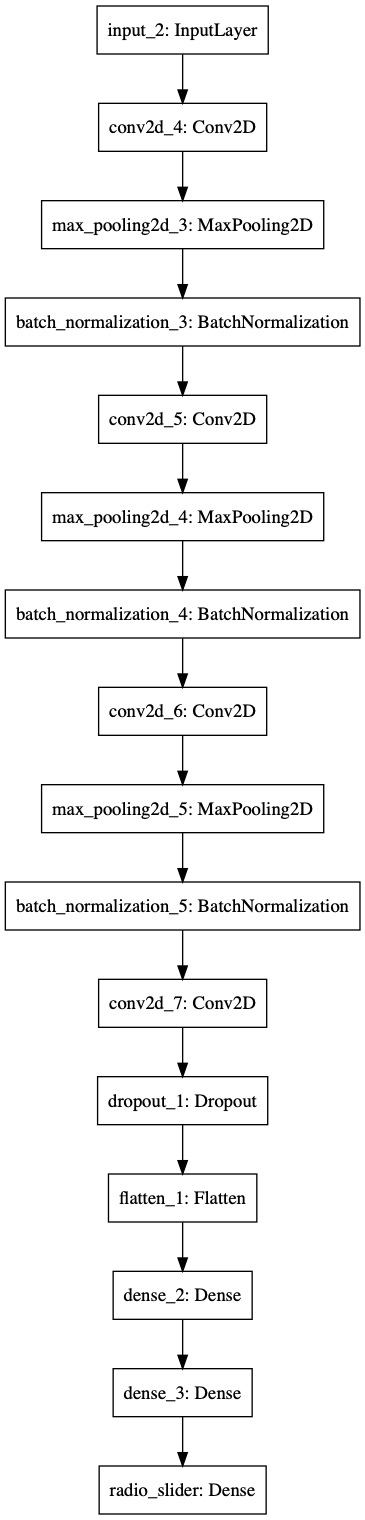

In [21]:
plot_model(model, to_file='model.png')

In [22]:
adam = tf.keras.optimizers.Nadam(lr=.00001)
# model.compile(loss=['sparse_categorical_crossentropy', 'mse'], optimizer=adam, metrics=['accuracy', 'mae'])
model.compile(loss='mse', optimizer=adam, metrics=['mae'])

In [23]:
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# patient early stopping
es = EarlyStopping(patience=30, monitor='val_mae', mode='min')
mc = ModelCheckpoint('best_model_wattmeter.h5', verbose=1, save_best_only=True)

In [24]:
# history = model.fit(X_train, [y_train], epochs=100, batch_size=32, callbacks=[es, mc])
history = model.fit(X_train, y_train, epochs=250, batch_size=32, callbacks=[es, mc], validation_data=(X_test, y_test))

Train on 20700 samples, validate on 2300 samples
Epoch 1/250
20672/20700 [============================>.] - ETA: 0s - loss: 0.1192 - mae: 0.2645
Epoch 00001: val_loss improved from inf to 0.08267, saving model to best_model_wattmeter.h5
20700/20700 [==============================] - 70s 3ms/sample - loss: 0.1192 - mae: 0.2645 - val_loss: 0.0827 - val_mae: 0.2393
Epoch 2/250
20672/20700 [============================>.] - ETA: 0s - loss: 0.0486 - mae: 0.1689
Epoch 00002: val_loss improved from 0.08267 to 0.03513, saving model to best_model_wattmeter.h5
20700/20700 [==============================] - 66s 3ms/sample - loss: 0.0486 - mae: 0.1689 - val_loss: 0.0351 - val_mae: 0.1477
Epoch 3/250
20672/20700 [============================>.] - ETA: 0s - loss: 0.0314 - mae: 0.1342
Epoch 00003: val_loss improved from 0.03513 to 0.02309, saving model to best_model_wattmeter.h5
20700/20700 [==============================] - 67s 3ms/sample - loss: 0.0314 - mae: 0.1342 - val_loss: 0.0231 - val_mae: 0.

In [25]:
# model.save("model.h5")
# saved_model = load_model('model.h5')
saved_model = load_model('best_model_wattmeter.h5')

In [26]:
_, train_acc = saved_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.040, Test: 0.039


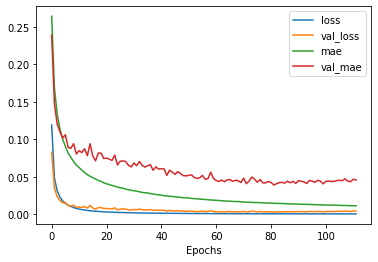

In [27]:
# plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [21]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


## Testing

In [22]:
saved_model = load_model('best_model_wattmeter.h5')

In [35]:
samples_path = "wattmeter_samples/"

def predict(ind, file_path):
                    
    im = Image.open(file_path + str(ind))
    plt.imshow(im, cmap='gist_gray')
    print('Input image:')
    plt.show()
    im = im.convert('L')
    im = im.resize((im_width,im_height), Image.ANTIALIAS)
    im = np.array(im)
    im = preprocess(im).reshape((1, im_width, im_height, channel))

    predicted_val = saved_model.predict(im)
    
    # hour = np.argmax(time[0])
    # minute = int(time[1][0][0]*5)
    # print('Detected value:', str(minute))
    # print(int(time[0][0]*106+54))
    print(int(predicted_val*23+(-3)))

Input image:


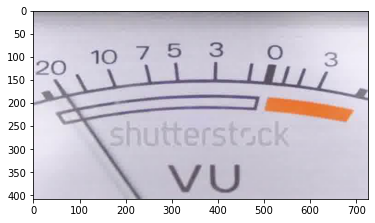

18
######
Input image:


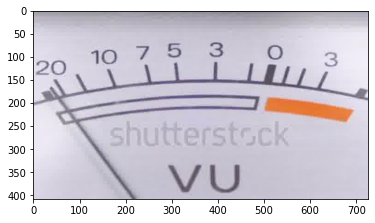

18
######
Input image:


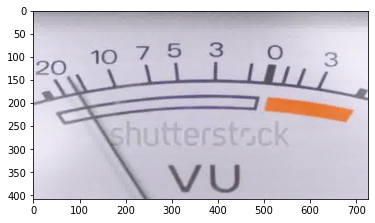

15
######
Input image:


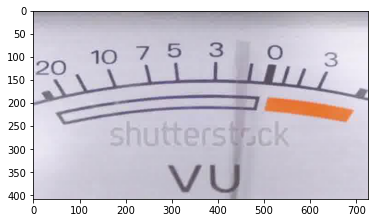

1
######
Input image:


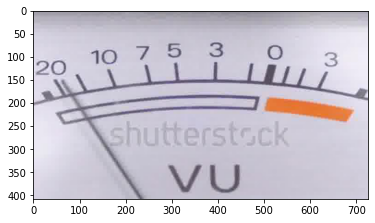

17
######
Input image:


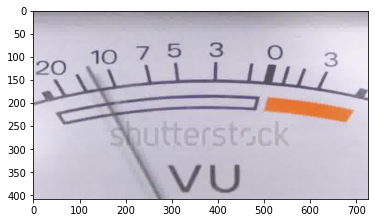

11
######
Input image:


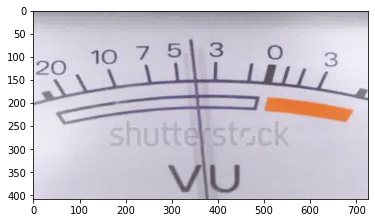

4
######
Input image:


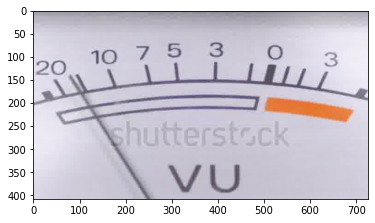

14
######
Input image:


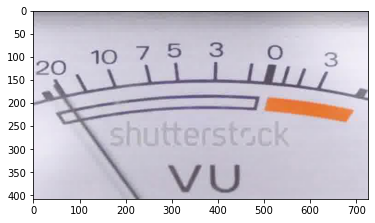

18
######
Input image:


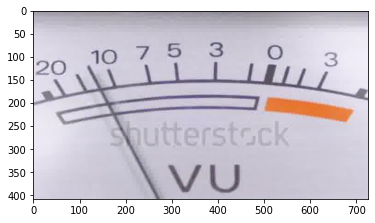

12
######


In [39]:
files = []

for f in glob.glob("wattmeter_samples/*"):
    if os.path.isfile(f):
        files.append(os.path.basename(f))

#print(files)

for img in random.sample(list(files), 10):
    predict(img, "wattmeter_samples/")
    print("######")

## Testing on the test set from train test split

In [25]:
len(X_test)

9600

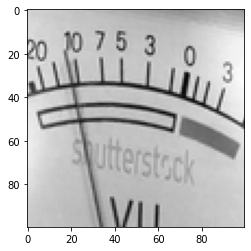

10
-----------------


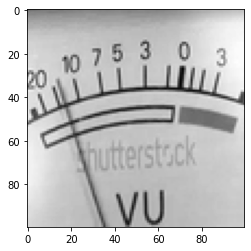

11
-----------------


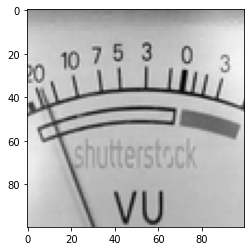

15
-----------------


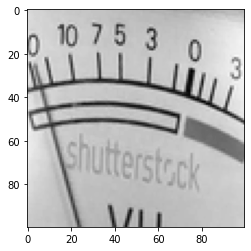

16
-----------------


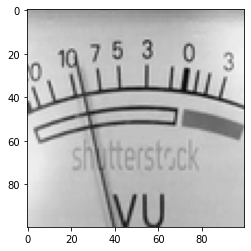

7
-----------------


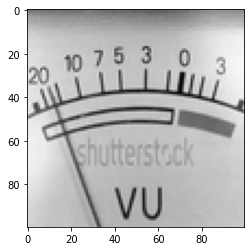

15
-----------------


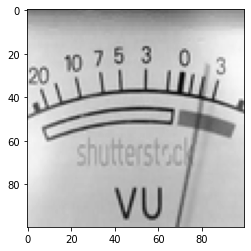

-2
-----------------


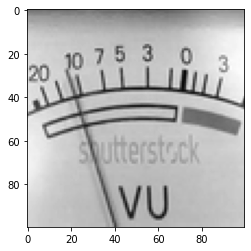

9
-----------------


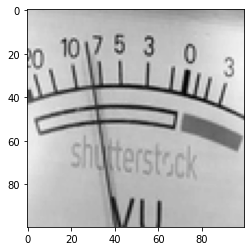

6
-----------------


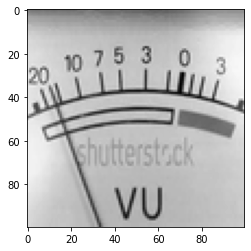

14
-----------------


In [26]:
for i in random.sample(list(X_test), 10):
    pruebame = i.reshape(1,im_width,im_height,1)
    time = saved_model.predict(pruebame)


    please = np.squeeze((i*255).astype(int))

    plt.imshow(please, cmap='gist_gray')
    plt.show()
    print(int(time*23+(-3)))
    print("-----------------")